In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv(r'Mall_Customers.csv')

In [5]:
x = dataset.drop('CustomerID', axis = 1)

In [6]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x.Genre = le.fit_transform(x.Genre)

In [8]:
x


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Aplicando Elbow Method 


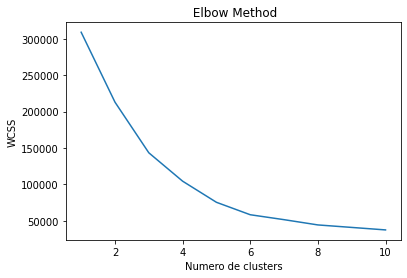

In [10]:
from sklearn.cluster import KMeans

wcss = [] #lista das distancias 

for i in range (1,11): #define um range de teste 
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title(' Elbow Method')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)


In [13]:
x['cluster'] = y_kmeans

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

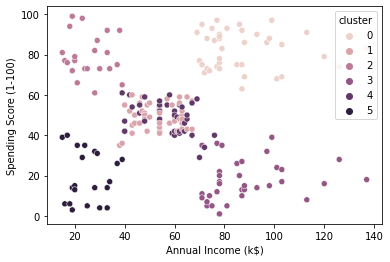

In [15]:
import seaborn as sns

sns.scatterplot(data = x, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster')